In [15]:
def gradient_descent(f, x, y, z):

    fpx = f.diff(x)  # Partial derivative of function with respect to x
    fpy = f.diff(y)  # Partial derivative of function with respect to y

    grad = [fpx, fpy]  # Gradient
    # Data
    theta = 0.1  # x
    theta1 = 0.1  # y
    eta = 0.01

    iterations = 0
    precision = 1 / 1000000
    printData = True
    pointChangeCount = 0
    x_array = []
    y_array = []
    z_array = []
    x_array.append(theta)
    y_array.append(theta1)
    print("Initial point w0 is (" + str(theta) + ", " + str(theta1) + ") and initial eta is " + str(eta))

    while True:
        temptheta = theta - eta * N(fpx.subs(x, theta).subs(y, theta1)).evalf()
        temptheta1 = theta1 - eta * N(fpy.subs(y, theta1)).subs(x, theta).evalf()

        fxy = N(fpy.subs(x, temptheta)).subs(y, temptheta1).evalf()

        # If the number of iterations goes up too much, theta and/or theta1 is diverging.
        iterations += 1

        if temptheta + temptheta1 >= 1:
            pointChangeCount += 1
            temptheta = random.uniform(0, 1)
            temptheta1 = random.uniform(0, 1)
            eta = 0.01 / pointChangeCount
            print("New point w" + str(pointChangeCount) + " is (" + str(temptheta) + ", " + str(
                temptheta1) + ") and new eta is " + str(eta))

        # If the change in the value of theta is very less or less than threshold, it is converged
        if abs(temptheta - theta) < precision and abs(temptheta1 - theta1) < precision:
            break

        # Simultaneous update
        theta = temptheta
        theta1 = temptheta1
        x_array.append(theta)
        y_array.append(theta1)
        z_array.append(fxy)

    if printData:
        print("The function " + str(f) + " converges to a minimum")
        print("Number of iterations:", iterations, sep=" ")
        print("theta (x) =", temptheta, sep=" ")
        print("theta1 (y) =", temptheta1, sep=" ")

    for i in range(0, iterations):
        plt.plot(x_array[i], y_array[i], 'ro')
    plt.show()


Initial point w0 is (0.1, 0.1) and initial eta is 0.01
The function -log(x) - log(y) - log(-x - y + 1) converges to a minimum
Number of iterations: 37
theta (x) = 0.333330978722242
theta1 (y) = 0.333330978722242


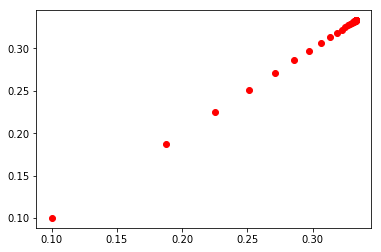

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


def main():
    
    x = Symbol('x')
    y = Symbol('y')
    z = Symbol('z')

    f1 = log(1 - x - y)
    f2 = log(x)
    f3 = log(y)
    f = -(f1 + f2 + f3)
    gradient_descent(f, x, y, z)
    
main()